# Notebook Setup
Installs necessary requirements and configures proper notebook behavior  
Note: The notebook assumes you are using the base conda environment

In [16]:
%load_ext autoreload
%autoreload 2
    
print("Notebook setup has completed")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Notebook setup has completed


# Environment Setup
Downloads configured dataset and performs necessary environment bootstrapping

In [17]:
from bootstrap import setup


# Please rename .env-template to .env and adjust values as needed
setup()

print("Environment setup has completed")

del setup

Environment setup has completed


# Sandbox
Available data split into training, testing, and validation sets

In [68]:
word_vectorizer = CountVectorizer()
a = word_vectorizer.fit_transform(reviews)
print(word_vectorizer.get_feature_names_out())

['10' '15' '1990' '25' '70' '950' 'about' 'accustomed' 'acting' 'action'
 'actors' 'addiction' 'adrian' 'adventure' 'after' 'agenda' 'agreements'
 'air' 'aired' 'alive' 'all' 'allen' 'almost' 'also' 'amazing' 'an' 'and'
 'another' 'anxiously' 'any' 'anymore' 'appeal' 'are' 'arguing' 'around'
 'arthur' 'aryans' 'as' 'at' 'audiences' 'average' 'await' 'awakening'
 'away' 'awful' 'back' 'bad' 'band' 'basically' 'bbc' 'be' 'become' 'been'
 'being' 'believable' 'believe' 'best' 'bette' 'big' 'bit' 'bitches'
 'black' 'boogeyman' 'boring' 'boy' 'br' 'bread' 'brilliance' 'brilliant'
 'bring' 'brings' 'brutality' 'buscemi' 'but' 'by' 'called' 'camp' 'can'
 'career' 'carol' 'case' 'cast' 'cause' 'cells' 'change' 'characters'
 'charm' 'cheap' 'children' 'chose' 'chosen' 'christians' 'city' 'class'
 'classic' 'closet' 'come' 'comeback' 'comedies' 'comedy' 'comes'
 'comfortable' 'comforting' 'comments' 'complete' 'concerning'
 'conditioned' 'connect' 'connected' 'contact' 'continued' 'control'
 'co

In [99]:
from preprocessing import get_dataframe, get_subsets
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df = get_dataframe()  # In the form [features, labels]

word_vectorizer = CountVectorizer()
reviews = df["review"].to_numpy()
processed_data = pd.DataFrame(word_vectorizer.fit_transform(reviews).toarray())
processed_data['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# TODO: Transform raw text into a representation suitable for a MLP
# df can has as many feature columns as needed, but the last column must be the label column

X_train, X_test, X_validate, y_train, y_test, y_validate = get_subsets(processed_data)


# Manual Testing

In [100]:
print("Data and shapes:")
print("X_train: ", X_train.shape)
print("X_train example: ", X_train[0])
print("y_train: ", y_train.shape)
print("y_train example: ", y_train[0])

Data and shapes:
X_train:  (600, 17922)
X_train example:  [0 0 0 ... 0 0 0]
y_train:  (600,)
y_train example:  0


In [108]:
from mlp import MultiLayerPerceptron
from analysis import accuracy

input_size = X_train.shape[1]

mlp = MultiLayerPerceptron(
    epochs=150,
    lr=0.05,
    input_layer=input_size,
    hidden_layers=[30, 10],
    output_layer=1,
    activation="sigmoid",
)

mlp.fit(X_train, y_train)

100%|██████████| 150/150 [15:32<00:00,  6.21s/it]


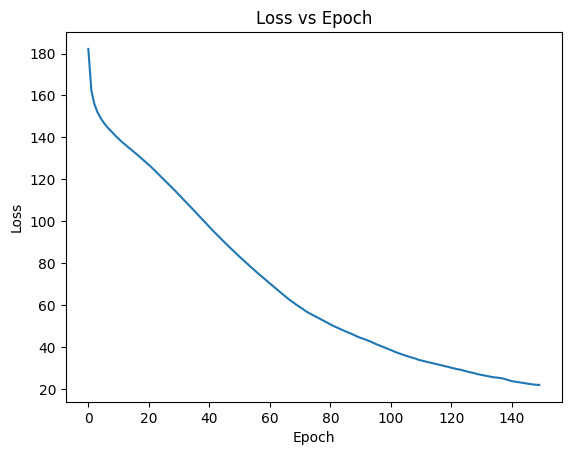

In [110]:
mlp.plot_loss()

In [113]:
print(accuracy(mlp.predict(X_test), y_test))

0.55


In [105]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)
print(accuracy(clf.predict(X_train), y_train))

0.87


# Training

In [ ]:
from sympy import Lambda, Symbol
from training import matrix_train


x = Symbol("x")


# each axis must be an iterable. if you want to use a constant, wrap it in an iterable of len 1
hyperparameter_matrix = {
    "epochs": np.logspace(np.log10(100), np.log10(100000), num=20, dtype="int64"),
    "lr": np.logspace(np.log10(.00001), np.log10(.1), num=20),
    "hidden_layers": [5, 6, 7],
    "neurons_per_layer": [3],
    "activation": [Lambda(x, x**2)],
}

best_params = matrix_train(hyperparameter_matrix, MultiLayerPerceptron, X_train, y_train, X_test, y_test)

print(best_params)
# mlp = MultiLayerPerceptron(**best_params)


# Performance

In [ ]:
from analysis import accuracy, confusion, report


mlp = MultiLayerPerceptron(**best_params)
mlp.fit(X_train, y_train)

# print(accuracy(mlp.predict(X_test), y_test))
# print(confusion(mlp.predict(X_test), y_test))
print(report(mlp.predict(X_test), y_test))


# Benchmarking

In [ ]:
# TODO utilize other classifiers and compare performance